In [17]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [18]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

In [19]:
def preprocess_images(images):
    edge_images = []
    for image in images:
        # Converting to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Applying edge detection
        edges = cv2.Canny(gray, 100, 200)
        edge_images.append(edges.flatten())
    return edge_images

In [20]:
def perform_clustering_with_elbow_method(edge_features, cluster_range):
    wcss = []
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=None)
        kmeans.fit(edge_features)
        wcss.append(kmeans.inertia_)  

    # elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, wcss, 'bo-', markerfacecolor='red', markersize=10)
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-cluster sum of squares)')
    plt.grid(True)
    plt.show()

  

In [21]:
def perform_clustering(edge_features, n_clusters, n_init=10):
    best_score = -1
    best_labels = None

    # Multiple times clustering to find the best clustering outcome
    for _ in range(n_init):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None)
        labels = kmeans.fit_predict(edge_features)
        if len(set(labels)) > 1:  
            score = silhouette_score(edge_features, labels)
            if score > best_score:
                best_score = score
                best_labels = labels

    print(f"Testing {n_clusters} clusters: Best Silhouette Score = {best_score}")
    return best_labels

In [22]:
def display_clustered_images(images, labels,filenames):
    n_clusters = len(set(labels))
    fig, axs = plt.subplots(n_clusters, figsize=(15, n_clusters*3))
    for i in range(n_clusters):
        cluster_images = [img for img, label in zip(images, labels) if label == i]
        combined_image = np.hstack(cluster_images) 
        axs[i].imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(f'Cluster {i+1}')
        axs[i].axis('off')
    plt.show()
    
    for i in range(n_clusters):
        print(f"Cluster {i+1}: {[filename for filename, label in zip(filenames, labels) if label == i]}")

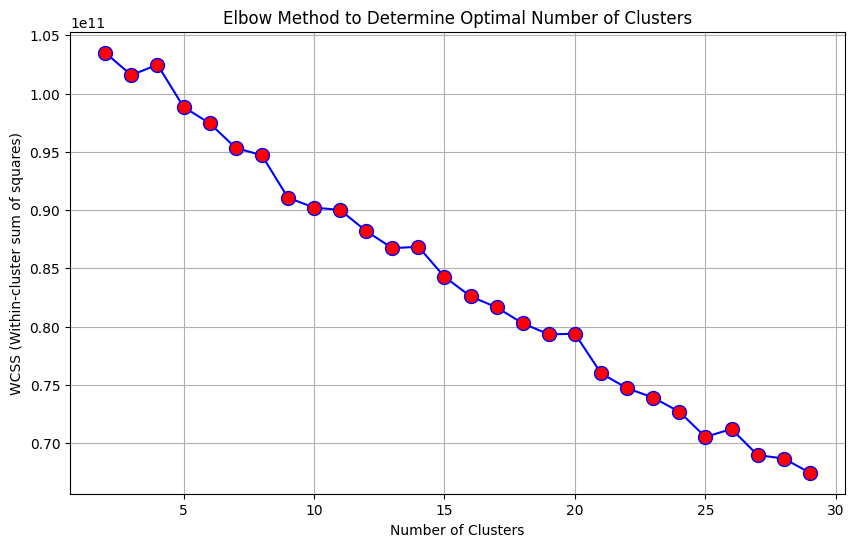

Testing 20 clusters: Best Silhouette Score = 0.21680994328982708


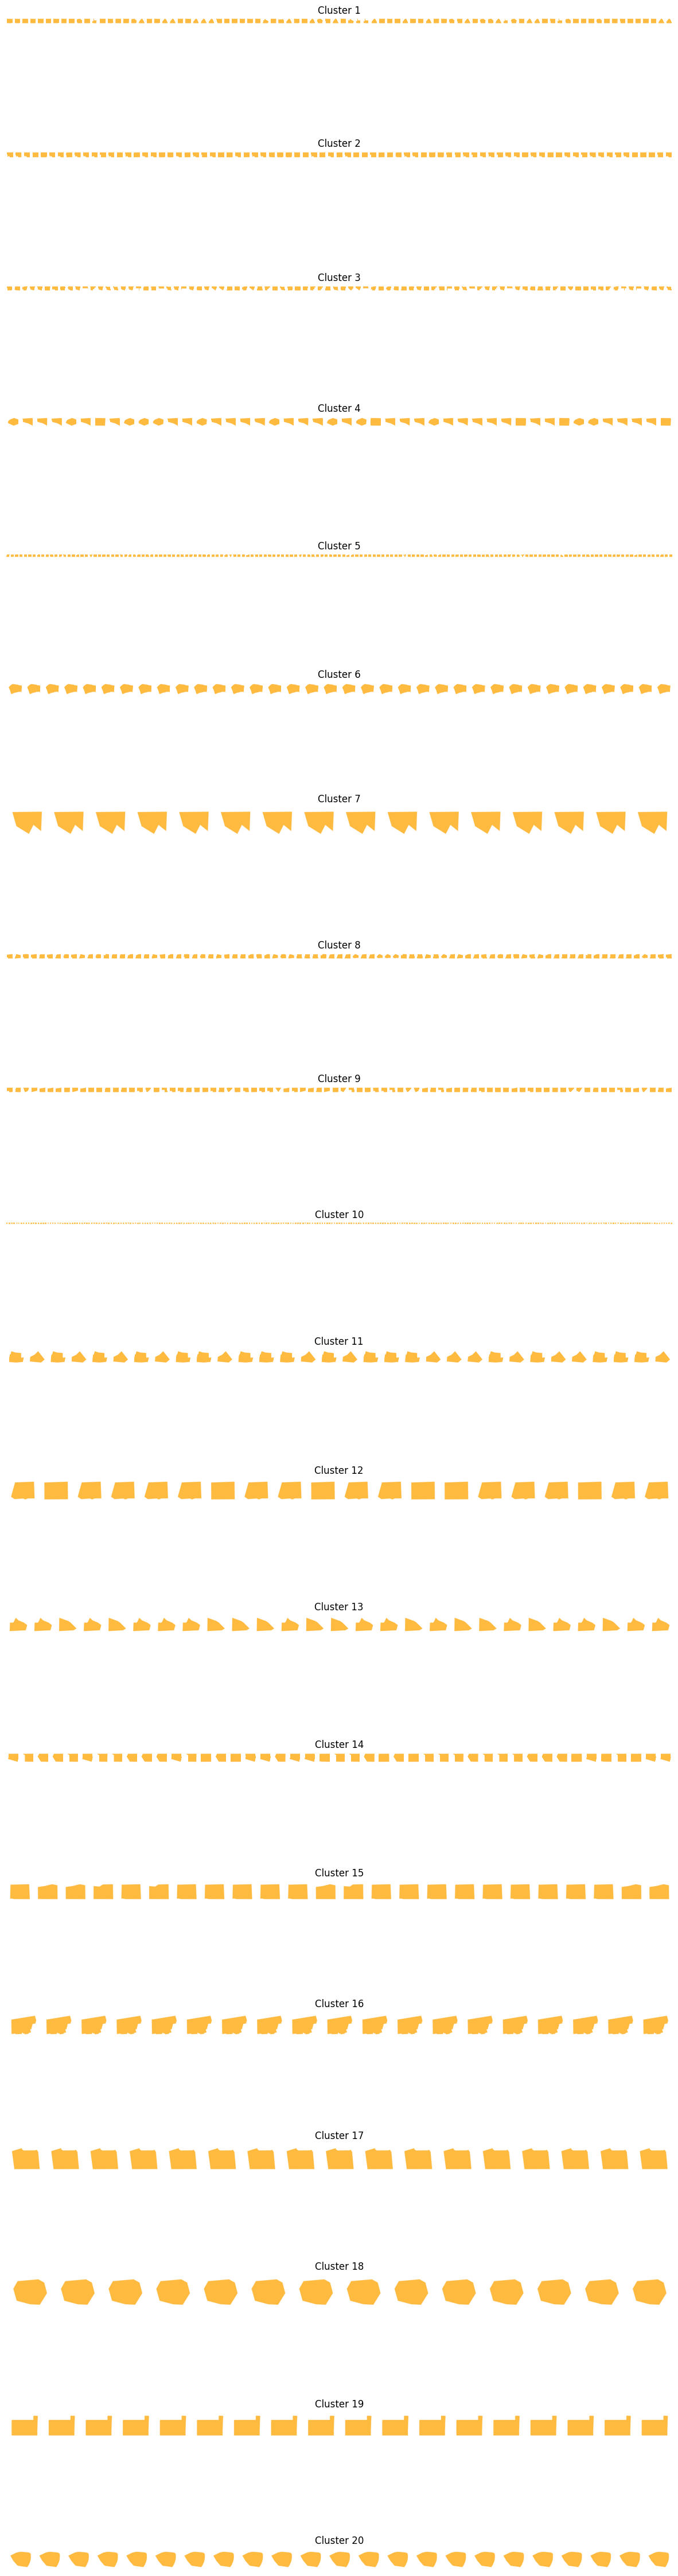

Cluster 1: ['0005.jpg', '0018.jpg', '0029.jpg', '0030.jpg', '0032.jpg', '0037.jpg', '0049.jpg', '0085.jpg', '0100.jpg', '0102.jpg', '0109.jpg', '0144.jpg', '0145.jpg', '0155.jpg', '0174.jpg', '0208.jpg', '0213.jpg', '0218.jpg', '0244.jpg', '0265.jpg', '0273.jpg', '0300.jpg', '0302.jpg', '0361.jpg', '0406.jpg', '0407.jpg', '0411.jpg', '0413.jpg', '0426.jpg', '0456.jpg', '0460.jpg', '0470.jpg', '0486.jpg', '0508.jpg', '0539.jpg', '0551.jpg', '0552.jpg', '0554.jpg', '0558.jpg', '0559.jpg', '0563.jpg', '0592.jpg', '0623.jpg', '0631.jpg', '0646.jpg', '0666.jpg', '0688.jpg', '0720.jpg', '0737.jpg', '0738.jpg', '0741.jpg', '0786.jpg', '0790.jpg', '0793.jpg', '0795.jpg', '0831.jpg', '0841.jpg', '0842.jpg', '0851.jpg', '0858.jpg', '0862.jpg', '0867.jpg', '0893.jpg', '0908.jpg', '0939.jpg', '0950.jpg', '0953.jpg', '0955.jpg', '0957.jpg', '0977.jpg', '0986.jpg', '0991.jpg', '0996.jpg', '1012.jpg', '1022.jpg', '1053.jpg', '1075.jpg', '1088.jpg', '1110.jpg', '1116.jpg', '1130.jpg', '1144.jpg', '115

In [23]:
image_directory = 'E7-images'

images, filenames = load_images_from_folder(image_directory)


edge_features = preprocess_images(images)

cluster_range = range(2, 30)  # Test from 2 to 29 clusters

perform_clustering_with_elbow_method(edge_features, cluster_range)
best_labels = perform_clustering(edge_features,20,n_init=10)

display_clustered_images(images, best_labels,filenames)